In [ ]:
#Carga y Exploración de Datos
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/sample_data/hotel_bookings_clean.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [ ]:
#Valores Nulos
# Descripción estadística de las variables numéricas
desc_stats = df.describe()

# Creación de la columna de ocupación
df['occupancy'] = df['adults'] + df['children'] + df['babies']

# Filtrado de las reservas no canceladas
df_not_canceled = df[df['is_canceled'] == 0]

# Agrupación de la ocupación por mes y año
df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' +
                                                  df_not_canceled['arrival_date_month'] + '-' +
                                                  df_not_canceled['arrival_date_day_of_month'].astype(str))
monthly_occupancy = df_not_canceled.groupby(df_not_canceled['arrival_date'].dt.to_period('M')).agg({'occupancy': 'sum'}).reset_index()

# Valores nulos
null_values = df.isnull().sum()

(desc_stats, monthly_occupancy.head(), null_values)

<ipython-input-27-1658536a2721>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' +


(         is_canceled      lead_time  arrival_date_year  \
 count  119390.000000  119390.000000      119390.000000   
 mean        0.370416     104.011416        2016.156554   
 std         0.482918     106.863097           0.707476   
 min         0.000000       0.000000        2015.000000   
 25%         0.000000      18.000000        2016.000000   
 50%         0.000000      69.000000        2016.000000   
 75%         1.000000     160.000000        2017.000000   
 max         1.000000     737.000000        2017.000000   
 
        arrival_date_week_number  arrival_date_day_of_month  \
 count             119390.000000              119390.000000   
 mean                  27.165173                  15.798241   
 std                   13.605138                   8.780829   
 min                    1.000000                   1.000000   
 25%                   16.000000                   8.000000   
 50%                   28.000000                  16.000000   
 75%                   38.

<ipython-input-5-09e6dd7bb862>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date'])


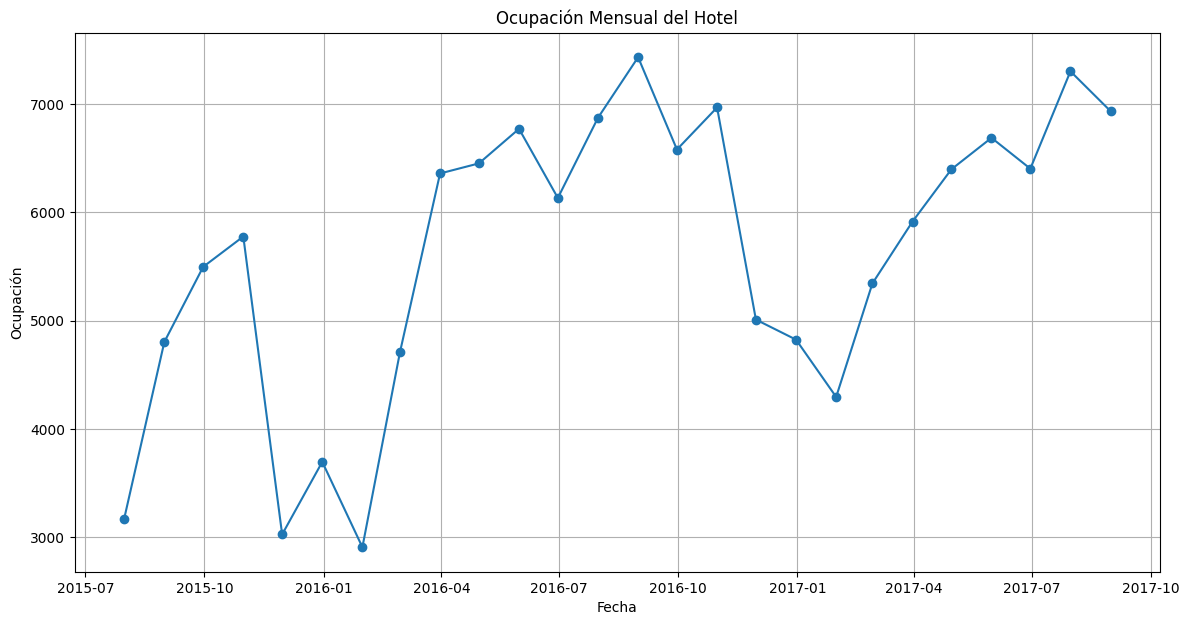

In [ ]:
#Visualización de la Ocupación Mensual
import matplotlib.pyplot as plt

# Convertir la columna 'arrival_date' a datetime si no se hizo antes
df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date'])

# Agrupar la ocupación por mes y año
monthly_occupancy = df_not_canceled.resample('M', on='arrival_date')['occupancy'].sum()

# Plot de la ocupación mensual
plt.figure(figsize=(14, 7))
plt.plot(monthly_occupancy.index, monthly_occupancy.values, marker='o')
plt.title('Ocupación Mensual del Hotel')
plt.xlabel('Fecha')
plt.ylabel('Ocupación')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df['reservation_status_date']

0         01/07/2015
1         01/07/2015
2         02/07/2015
3         02/07/2015
4         03/07/2015
             ...    
119385    06/09/2017
119386    07/09/2017
119387    07/09/2017
119388    07/09/2017
119389    07/09/2017
Name: reservation_status_date, Length: 119390, dtype: object

In [ ]:
pd.to_datetime(df['reservation_status_date'], dayfirst=True)

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [ ]:
daily_bookings = df.groupby('reservation_status_date').size().reset_index(name='reservations')
daily_bookings

,reservation_status_date,reservations
0,01/01/2015,763
1,01/01/2016,99
2,01/01/2017,149
3,01/02/2016,258
4,01/02/2017,135
...,...,...
921,31/08/2017,74
922,31/10/2015,162
923,31/10/2016,139
924,31/12/2015,68


In [ ]:
daily_bookings = daily_bookings.rename(columns={'reservation_status_date': 'ds', 'reservations': 'y'})
daily_bookings

,ds,y
0,01/01/2015,763
1,01/01/2016,99
2,01/01/2017,149
3,01/02/2016,258
4,01/02/2017,135
...,...,...
921,31/08/2017,74
922,31/10/2015,162
923,31/10/2016,139
924,31/12/2015,68


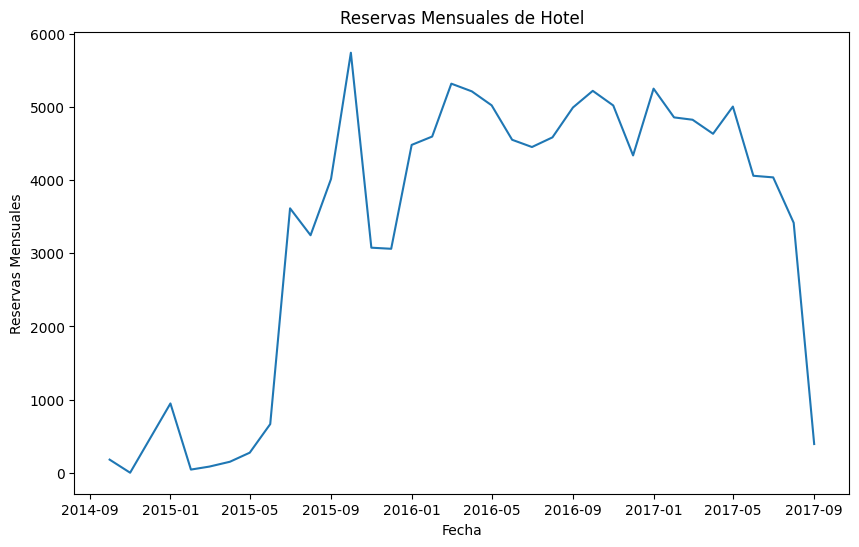

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar el dataset
df = pd.read_csv('/content/sample_data/hotel_bookings_clean.csv')

# Convertir la columna de fecha a formato datetime con dayfirst=True
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

# Agrupar las reservas por mes y año
df['year_month'] = df['reservation_status_date'].dt.to_period('M')
monthly_bookings = df.groupby('year_month').size().reset_index(name='reservations')
monthly_bookings['year_month'] = monthly_bookings['year_month'].dt.to_timestamp()
monthly_bookings = monthly_bookings.rename(columns={'year_month': 'ds', 'reservations': 'y'})

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings['ds'], monthly_bookings['y'])
plt.xlabel('Fecha')
plt.ylabel('Reservas Mensuales')
plt.title('Reservas Mensuales de Hotel')
plt.show()

# Modelo prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqa71tzz2/d2tbcqp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqa71tzz2/d788rrr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88159', 'data', 'file=/tmp/tmpqa71tzz2/d2tbcqp4.json', 'init=/tmp/tmpqa71tzz2/d788rrr3.json', 'output', 'file=/tmp/tmpqa71tzz2/prophet_model82kn92vm/prophet_model-20240623080216.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:02:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:

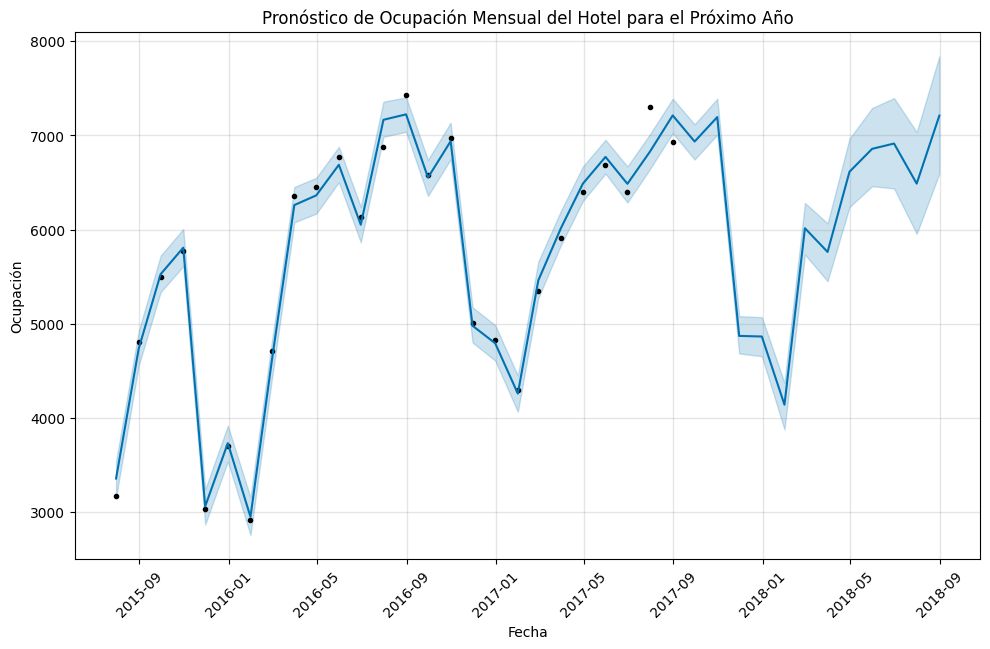

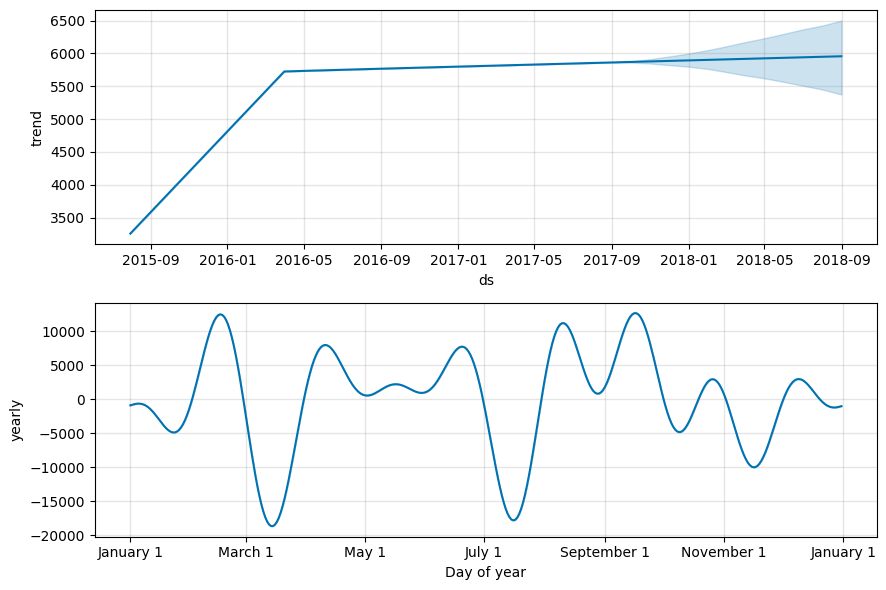

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/sample_data/hotel_bookings_clean.csv'
df = pd.read_csv(file_path)

# Convertir la columna 'arrival_date_year' y 'arrival_date_month' a una sola columna de fecha
df['arrival_date_year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']
df['arrival_date'] = pd.to_datetime(df['arrival_date_year_month'], format='%Y-%B')

# Crear una columna de ocupación
df['occupancy'] = df['adults'] + df['children'] + df['babies']

# Filtrar solo las reservas no canceladas
df_not_canceled = df[df['is_canceled'] == 0]

# Agrupar la ocupación por mes y año
monthly_occupancy = df_not_canceled.resample('M', on='arrival_date').agg({'occupancy': 'sum'}).reset_index()

# Preparar los datos para Prophet
prophet_df = monthly_occupancy.rename(columns={'arrival_date': 'ds', 'occupancy': 'y'})

# Ajustar el modelo Prophet
model = Prophet()
model.fit(prophet_df)

# Hacer el pronóstico para el próximo año
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualizar el pronóstico
fig = model.plot(forecast)
plt.title('Pronóstico de Ocupación Mensual del Hotel para el Próximo Año')
plt.xlabel('Fecha')
plt.ylabel('Ocupación')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Visualizar los componentes del pronóstico
fig2 = model.plot_components(forecast)
plt.show()


<ipython-input-49-09e6dd7bb862>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date'])


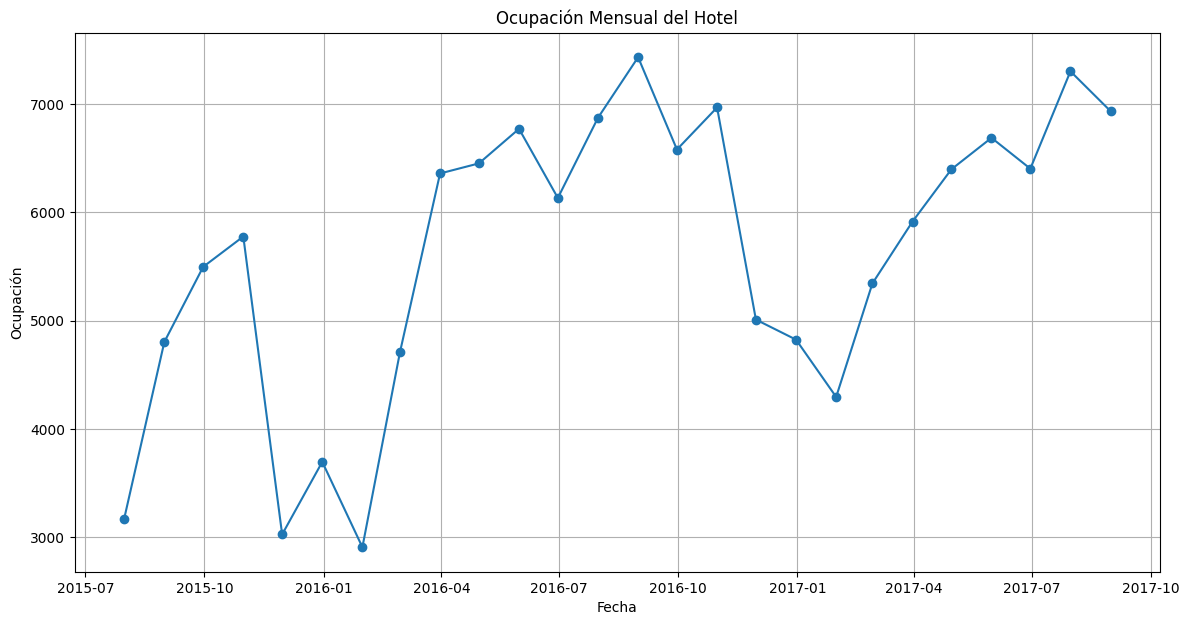

In [ ]:
#Visualización de la Ocupación Mensual
import matplotlib.pyplot as plt

# Convertir la columna 'arrival_date' a datetime si no se hizo antes
df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date'])

# Agrupar la ocupación por mes y año
monthly_occupancy = df_not_canceled.resample('M', on='arrival_date')['occupancy'].sum()

# Plot de la ocupación mensual
plt.figure(figsize=(14, 7))
plt.plot(monthly_occupancy.index, monthly_occupancy.values, marker='o')
plt.title('Ocupación Mensual del Hotel')
plt.xlabel('Fecha')
plt.ylabel('Ocupación')
plt.grid(True)
plt.show()


# Modelo ARIMA

In [ ]:
#Preprocesamiento y Separación de Datos
import pandas as pd
from sklearn.model_selection import train_test_split

# Crear la columna 'occupancy' (ocupación)
df['occupancy'] = df['adults'] + df['children'] + df['babies']

# Filtrar las reservas no canceladas
df_not_canceled = df[df['is_canceled'] == 0]

# Crear la columna 'arrival_date' (fecha de llegada)
df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' +
                                                  df_not_canceled['arrival_date_month'] + '-' +
                                                  df_not_canceled['arrival_date_day_of_month'].astype(str))

# Agrupar la ocupación por mes y año
monthly_occupancy = df_not_canceled.resample('M', on='arrival_date')['occupancy'].sum().reset_index()

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(monthly_occupancy) * 0.8)
train, test = monthly_occupancy[:train_size], monthly_occupancy[train_size:]

<ipython-input-50-5f7bf460ea14>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' +


<ipython-input-51-bb66e644d4b5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


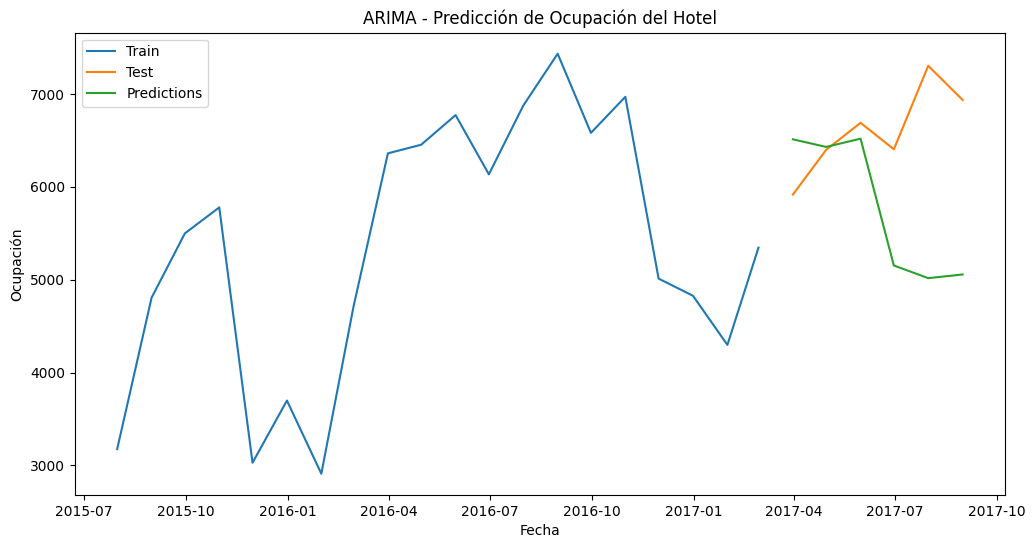

In [ ]:
#Modelado con ARIMA
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Modelo ARIMA
model = ARIMA(train['occupancy'], order=(5,1,0))
model_fit = model.fit()

# Predicciones
predictions = model_fit.forecast(steps=len(test))

# Evaluación del modelo
test['predictions'] = predictions

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(train['arrival_date'], train['occupancy'], label='Train')
plt.plot(test['arrival_date'], test['occupancy'], label='Test')
plt.plot(test['arrival_date'], test['predictions'], label='Predictions')
plt.xlabel('Fecha')
plt.ylabel('Ocupación')
plt.title('ARIMA - Predicción de Ocupación del Hotel')
plt.legend()
plt.show()


In [ ]:
#Evaluación del Modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['occupancy'], test['predictions'])
mae = mean_absolute_error(test['occupancy'], test['predictions'])

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 1785337.3077164069
MAE: 1035.833162558845
